In [1]:
import pandas as pd 
import numpy as np

In [2]:
df_scaled = pd.read_csv("df_scaled.csv").drop(columns=["Unnamed: 0"])

Parameters: {'eps': 0.01, 'min_samples': 10} Silhouette Score: -0.491443848863277
Parameters: {'eps': 0.01, 'min_samples': 30} Silhouette Score: -0.2883564690480852
Parameters: {'eps': 0.01, 'min_samples': 50} Silhouette Score: -0.3280196908169577
Parameters: {'eps': 0.03, 'min_samples': 10} Silhouette Score: 0.41937996480244816
Parameters: {'eps': 0.03, 'min_samples': 30} Silhouette Score: 0.31606603517613124
Parameters: {'eps': 0.03, 'min_samples': 50} Silhouette Score: 0.20396650302453082
Parameters: {'eps': 0.05, 'min_samples': 30} Silhouette Score: 0.47132803824285757
Parameters: {'eps': 0.05, 'min_samples': 50} Silhouette Score: 0.358987107466234
Parameters: {'eps': 0.07, 'min_samples': 30} Silhouette Score: 0.4823399303077547
Parameters: {'eps': 0.07, 'min_samples': 50} Silhouette Score: 0.5346165176416073


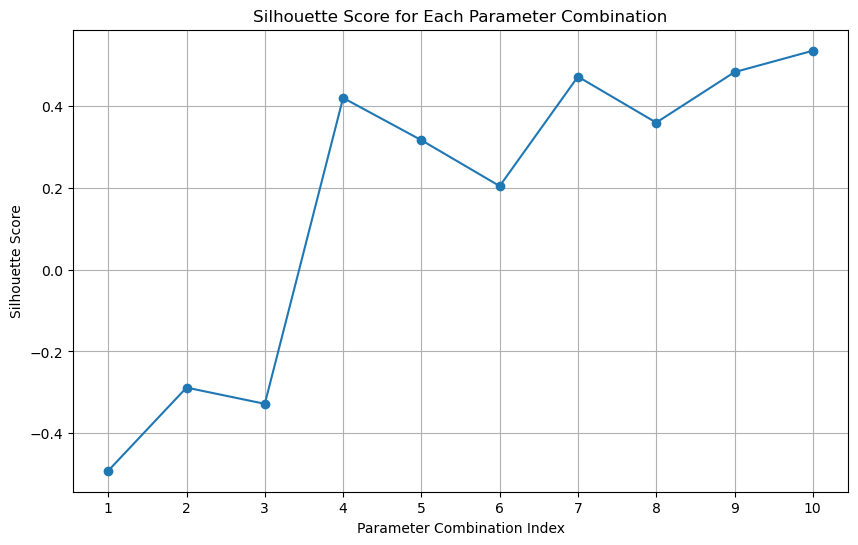

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

param_grid = {
    'eps': [0.01 , 0.03 , 0.05 , 0.07 ],
    'min_samples': [ 10 , 30 , 50 ]
}

best_score = -1
best_params = None


silhouette_scores = []  

# Loop through each parameter combination
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    cluster_labels = dbscan.fit_predict(df_scaled)
    
    if len(np.unique(cluster_labels)) <= 1: 
        continue
    
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)  
    
    print("Parameters:", params, "Silhouette Score:", silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each Parameter Combination')
plt.xticks(range(len(silhouette_scores)), range(1, len(silhouette_scores) + 1))
plt.grid(True)
plt.show()

In [4]:
db = DBSCAN(eps=0.07,               # The maximum distance between two samples for them to be considered as in the same neighborhood
            min_samples=50,         # The number of samples in a neighborhood for a point to be considered as a core point
            metric='euclidean',    # The metric to use when calculating distance between instances in a feature array
            metric_params=None,    # Additional keyword arguments for the metric function
            algorithm='auto',      # The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors
            leaf_size=30,          # Leaf size passed to BallTree or cKDTree
            p=None,                # The power of the Minkowski metric to be used to calculate distance between points
            n_jobs=None)           # The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors


db.fit(df_scaled)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 47


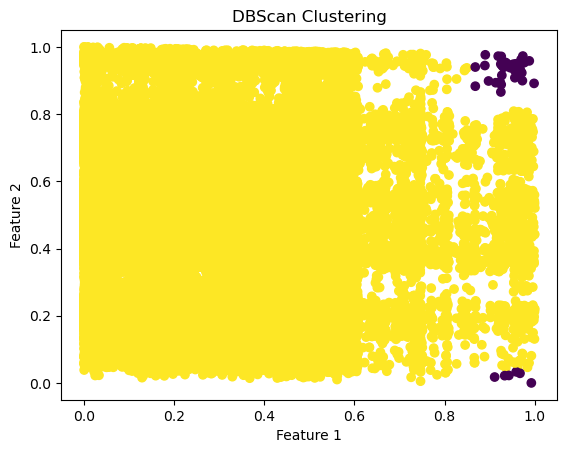

In [5]:

plt.scatter(df_scaled["PC1"], df_scaled["PC2"], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBScan Clustering')
plt.show()

In [6]:
res = pd.read_excel("result_kmeans.xlsx").drop(columns=["Unnamed: 0"]).rename(columns = {"Selected_Column" : "encounter_id"})

In [7]:
res["DB_label"] = labels

In [ ]:
res.to_excel("result.xlsx")